In [2]:
import pandas as pd
import numpy as np
import datetime

In [3]:
df_airlines = pd.read_csv('./data/airlines.csv')
df_airports = pd.read_csv('./data/airports.csv')
df_future = pd.read_csv('./data/future_data.csv')
df_historic = pd.read_csv('./data/historic_data.csv')

## Variables and Data Type

In [97]:
df_airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [98]:
df_airports.dtypes

IATA_CODE     object
AIRPORT       object
CITY          object
STATE         object
COUNTRY       object
LATITUDE     float64
LONGITUDE    float64
dtype: object

In [146]:
df_future.dtypes

SCHEDULED_DEPARTURE    object
SCHEDULED_ARRIVAL      object
AIRLINE                object
FLIGHT_NUMBER           int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
DISTANCE                int64
dtype: object

In [147]:
df_historic.dtypes

SCHEDULED_DEPARTURE     object
DEPARTURE_TIME          object
SCHEDULED_ARRIVAL       object
ARRIVAL_TIME            object
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

## No actual missing value

- delay cols are NA means 0
- depature_time taxi_out .... are NA means cancelled

In [90]:
def check_nan(df):
    cols1 = []
    for i in range(df_historic.shape[1]):
        col = df.columns[i]
        if(df[col].isna().sum()/df[col].shape[0] > 0):
            cols1.append(col)
            print("cols：",df.columns[i])
    print("number of cols：",len(cols1))
    df = df.drop(cols1,1)

In [91]:
check_nan(df_historic)

cols： DEPARTURE_TIME
cols： ARRIVAL_TIME
cols： TAIL_NUMBER
cols： DEPARTURE_DELAY
cols： TAXI_OUT
cols： WHEELS_OFF
cols： SCHEDULED_TIME
cols： ELAPSED_TIME
cols： AIR_TIME
cols： WHEELS_ON
cols： TAXI_IN
cols： CANCELLATION_REASON
cols： AIR_SYSTEM_DELAY
cols： SECURITY_DELAY
cols： AIRLINE_DELAY
cols： LATE_AIRCRAFT_DELAY
cols： WEATHER_DELAY
number of cols： 17


In [9]:
df_historic['DEPARTURE_DELAY']

0           1.0
1          28.0
2           NaN
3          -3.0
4          34.0
           ... 
2458623    -5.0
2458624    51.0
2458625    50.0
2458626    84.0
2458627    14.0
Name: DEPARTURE_DELAY, Length: 2458628, dtype: float64

In [ ]:
df_historic.groupby(['FLIGHT_NUMBER']).mean()['DEPARTURE_DELAY']

In [30]:
df_delay_tail = df_historic.groupby(['TAIL_NUMBER']).mean()['DEPARTURE_DELAY']

In [31]:
df_delay_flight = df_historic.groupby(['FLIGHT_NUMBER']).mean()['DEPARTURE_DELAY']

In [32]:
df_delay_tail

TAIL_NUMBER
7819A      9.478125
7820L     11.856354
N001AA    10.221805
N002AA    11.431095
N003AA     6.105263
            ...    
N997DL     7.941083
N998AT     8.121554
N998DL     7.146032
N999DN    10.499127
N9EAMQ    12.792908
Name: DEPARTURE_DELAY, Length: 4721, dtype: float64

In [93]:
df_historic[df_historic['DEPARTURE_TIME'].isna()]

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,...,DISTANCE,WHEELS_ON,TAXI_IN,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
2,2019-03-01 00:01:00,NaN,01:53:00,NaN,EV,4682,N15910,ORD,BHM,NaN,...,584,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
29,2019-03-01 00:08:00,NaN,02:39:00,NaN,OO,6378,N957SW,DEN,LBB,NaN,...,456,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
37,2019-03-01 00:11:00,NaN,02:59:00,NaN,UA,1881,NaN,ORD,IAD,NaN,...,588,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
38,2019-03-01 00:11:00,NaN,03:38:00,NaN,UA,1489,NaN,DEN,MEM,NaN,...,872,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
41,2019-03-01 00:14:00,NaN,03:14:00,NaN,UA,1610,NaN,DEN,MSP,NaN,...,680,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458496,2019-07-31 22:59:00,NaN,00:25:00,NaN,B6,2002,N565JB,JFK,BUF,NaN,...,301,NaN,NaN,1,C,NaN,NaN,NaN,NaN,NaN
2458519,2019-07-31 23:06:00,NaN,07:40:00,NaN,B6,670,N612JB,SJC,JFK,NaN,...,2569,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
2458520,2019-07-31 23:09:00,NaN,05:00:00,NaN,B6,994,N595JB,DEN,BOS,NaN,...,1754,NaN,NaN,1,C,NaN,NaN,NaN,NaN,NaN
2458558,2019-07-31 23:29:00,NaN,02:16:00,NaN,B6,551,N589JB,TPA,SJU,NaN,...,1237,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN


## Feature Selection

IF only consider *depature delay*

df_airlines does not provide any extra info, so not use it

Airport extra info: city, state, latitue, longitute

In [33]:
df_airports['STATE'].drop_duplicates().count()

54

In [30]:
df_airports['CITY'].drop_duplicates().count()

308

### cols in Test Data

- replace TAIL_NUMBER, FLIGHT_NUMBER with mean delay time in history data
- drop AIRPORT, replace it with CITY STATE LATITUDE LONGITUDE

In [55]:
drop_list = ['SCHEDULED_ARRIVAL']
df_test = df_future.drop(drop_list,axis=1)

In [42]:
df_delay_tail = pd.DataFrame(df_delay_tail)

In [44]:
df_delay_tail.columns

Index(['DEPARTURE_DELAY'], dtype='object')

In [45]:
df_test.join(df_delay_tail.set_index('DEPARTURE_DELAY'))

,SCHEDULED_DEPARTURE,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE
0,2022-08-01 00:05:00,AA,2400,N3LNAA,LAX,DFW,1235
0,2022-08-01 00:05:00,AA,2400,N3LNAA,LAX,DFW,1235
0,2022-08-01 00:05:00,AA,2400,N3LNAA,LAX,DFW,1235
0,2022-08-01 00:05:00,AA,2400,N3LNAA,LAX,DFW,1235
0,2022-08-01 00:05:00,AA,2400,N3LNAA,LAX,DFW,1235
...,...,...,...,...,...,...,...
469963,2022-08-31 23:59:00,B6,839,N658JB,JFK,BQN,1576
469964,2022-08-31 23:59:00,DL,1887,N855NW,SEA,DTW,1927
469965,2022-08-31 23:59:00,F9,300,N218FR,DEN,TPA,1506
469966,2022-08-31 23:59:00,F9,422,N954FR,DEN,ATL,1199


In [252]:
df_test['TAIL_NUMBER'] = 

,SCHEDULED_DEPARTURE,AIRLINE,ORIGIN_AIRPORT
0,2022-08-01 00:05:00,AA,LAX
1,2022-08-01 00:15:00,US,PHX
2,2022-08-01 00:15:00,F9,PHX
3,2022-08-01 00:20:00,AA,LAX
4,2022-08-01 00:25:00,NK,LAS
...,...,...,...
469963,2022-08-31 23:59:00,B6,JFK
469964,2022-08-31 23:59:00,DL,SEA
469965,2022-08-31 23:59:00,F9,DEN
469966,2022-08-31 23:59:00,F9,DEN


### Drop cols in Training Data

The extra feature in df_historic which df_future does not containe will be droped:
- TAXI_OUT
- WHEELS_OFF
- SCHEDULED_TIME
- ELAPSED_TIME
- AIR_TIME     
- WHEELS_ON
- TAXI_IN  
- ...

- drop DEPARTURE_TIME, because we have DEPARTURE_DELAY and SCHEDULED_DEPARTURE

In [277]:
df_train = df_historic.drop(['TAXI_OUT', 'WHEELS_OFF','SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','WHEELS_ON', 'TAXI_IN','DESTINATION_AIRPORT','TAIL_NUMBER','FLIGHT_NUMBER','DISTANCE','SCHEDULED_ARRIVAL','ARRIVAL_TIME','DEPARTURE_TIME'], axis=1)

In [275]:
df_train

,SCHEDULED_DEPARTURE,AIRLINE,ORIGIN_AIRPORT,DEPARTURE_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2019-03-01 00:01:00,UA,DEN,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-03-01 00:01:00,EV,ORD,28.0,0,NaN,0.0,0.0,19.0,0.0,0.0
2,2019-03-01 00:01:00,EV,ORD,NaN,1,B,NaN,NaN,NaN,NaN,NaN
3,2019-03-01 00:02:00,UA,ORD,-3.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-03-01 00:02:00,UA,ORD,34.0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,2019-03-01 00:36:00,UA,LAX,77.0,0,NaN,0.0,0.0,14.0,45.0,0.0
96,2019-03-01 00:39:00,AA,CLT,124.0,0,NaN,0.0,0.0,1.0,113.0,0.0
97,2019-03-01 00:39:00,AA,LAX,25.0,0,NaN,22.0,0.0,0.0,25.0,0.0
98,2019-03-01 00:40:00,AA,PHX,76.0,0,NaN,3.0,0.0,57.0,19.0,0.0


## Feature converting

### Time data process

In [56]:
def time_process(df):
    #df_test['Year'] = pd.to_datetime(df_test['SCHEDULED_DEPARTURE']).dt.year
    #df_test['Month'] = pd.to_datetime(df_test['SCHEDULED_DEPARTURE']).dt.month
    df['Day'] = pd.to_datetime(df['SCHEDULED_DEPARTURE']).dt.day
    df['SCHEDULED_DEPARTURE_Time'] = df['SCHEDULED_DEPARTURE'].apply(lambda x:x[-8:])
    df['Week_Day'] = pd.to_datetime(df['SCHEDULED_DEPARTURE']).dt.weekday
    df['Zero'] = '00:00:00'
    df['Dep_Time'] = (pd.to_datetime(df['SCHEDULED_DEPARTURE_Time']) - pd.to_datetime(df['Zero'])).apply(lambda x:x.seconds)
    df.drop(['Zero','SCHEDULED_DEPARTURE_Time','SCHEDULED_DEPARTURE'],axis=1,inplace=True)
    return df

In [57]:
df_test = time_process(df_test)

In [58]:
df_test

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Day,Week_Day,Dep_Time
0,AA,2400,N3LNAA,LAX,DFW,1235,1,0,300
1,US,2020,N547UW,PHX,CLT,1773,1,0,900
2,F9,1298,N922FR,PHX,CVG,1569,1,0,900
3,AA,258,N3HRAA,LAX,MIA,2342,1,0,1200
4,NK,612,N631NK,LAS,MSP,1299,1,0,1500
...,...,...,...,...,...,...,...,...,...
469963,B6,839,N658JB,JFK,BQN,1576,31,2,86340
469964,DL,1887,N855NW,SEA,DTW,1927,31,2,86340
469965,F9,300,N218FR,DEN,TPA,1506,31,2,86340
469966,F9,422,N954FR,DEN,ATL,1199,31,2,86340


In [278]:
df_train = time_process(df_train)

In [258]:
df_train

,AIRLINE,ORIGIN_AIRPORT,DEPARTURE_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Day,Week_Day,Dep_Time
0,UA,DEN,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,4,60
1,EV,ORD,28.0,0,NaN,0.0,0.0,19.0,0.0,0.0,1,4,60
2,EV,ORD,NaN,1,B,NaN,NaN,NaN,NaN,NaN,1,4,60
3,UA,ORD,-3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,4,120
4,UA,ORD,34.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,4,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,UA,LAX,77.0,0,NaN,0.0,0.0,14.0,45.0,0.0,1,4,2160
96,AA,CLT,124.0,0,NaN,0.0,0.0,1.0,113.0,0.0,1,4,2340
97,AA,LAX,25.0,0,NaN,22.0,0.0,0.0,25.0,0.0,1,4,2340
98,AA,PHX,76.0,0,NaN,3.0,0.0,57.0,19.0,0.0,1,4,2400


### Airport info

In [52]:
df_test = df_test.join(df_airports.set_index('IATA_CODE'),on='ORIGIN_AIRPORT').drop(['ORIGIN_AIRPORT','AIRPORT','COUNTRY'], axis = 1)

In [53]:
df_test

,SCHEDULED_DEPARTURE,FLIGHT_NUMBER,TAIL_NUMBER,DESTINATION_AIRPORT,DISTANCE,AA,AS,B6,DL,EV,...,NK,OO,UA,US,VX,WN,CITY,STATE,LATITUDE,LONGITUDE
0,2022-08-01 00:05:00,2400,N3LNAA,DFW,1235,1,0,0,0,0,...,0,0,0,0,0,0,Los Angeles,CA,33.94254,-118.40807
1,2022-08-01 00:15:00,2020,N547UW,CLT,1773,0,0,0,0,0,...,0,0,0,1,0,0,Phoenix,AZ,33.43417,-112.00806
2,2022-08-01 00:15:00,1298,N922FR,CVG,1569,0,0,0,0,0,...,0,0,0,0,0,0,Phoenix,AZ,33.43417,-112.00806
3,2022-08-01 00:20:00,258,N3HRAA,MIA,2342,1,0,0,0,0,...,0,0,0,0,0,0,Los Angeles,CA,33.94254,-118.40807
4,2022-08-01 00:25:00,612,N631NK,MSP,1299,0,0,0,0,0,...,1,0,0,0,0,0,Las Vegas,NV,36.08036,-115.15233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469963,2022-08-31 23:59:00,839,N658JB,BQN,1576,0,0,1,0,0,...,0,0,0,0,0,0,New York,NY,40.63975,-73.77893
469964,2022-08-31 23:59:00,1887,N855NW,DTW,1927,0,0,0,1,0,...,0,0,0,0,0,0,Seattle,WA,47.44898,-122.30931
469965,2022-08-31 23:59:00,300,N218FR,TPA,1506,0,0,0,0,0,...,0,0,0,0,0,0,Denver,CO,39.85841,-104.66700
469966,2022-08-31 23:59:00,422,N954FR,ATL,1199,0,0,0,0,0,...,0,0,0,0,0,0,Denver,CO,39.85841,-104.66700


In [279]:
df_train = df_train.join(df_airports.set_index('IATA_CODE'),on='ORIGIN_AIRPORT').drop(['ORIGIN_AIRPORT','AIRPORT'], axis = 1)

In [280]:
df_train

,AIRLINE,DEPARTURE_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Day,Week_Day,Dep_Time,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,UA,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,4,60,Denver,CO,USA,39.85841,-104.66700
1,EV,28.0,0,NaN,0.0,0.0,19.0,0.0,0.0,1,4,60,Chicago,IL,USA,41.97960,-87.90446
2,EV,NaN,1,B,NaN,NaN,NaN,NaN,NaN,1,4,60,Chicago,IL,USA,41.97960,-87.90446
3,UA,-3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,4,120,Chicago,IL,USA,41.97960,-87.90446
4,UA,34.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,4,120,Chicago,IL,USA,41.97960,-87.90446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458623,AA,-5.0,0,NaN,NaN,NaN,NaN,NaN,NaN,31,2,86340,Las Vegas,NV,USA,36.08036,-115.15233
2458624,AA,51.0,0,NaN,0.0,0.0,47.0,0.0,0.0,31,2,86340,Seattle,WA,USA,47.44898,-122.30931
2458625,AA,50.0,0,NaN,13.0,0.0,50.0,0.0,0.0,31,2,86340,Los Angeles,CA,USA,33.94254,-118.40807
2458626,B6,84.0,0,NaN,0.0,0.0,0.0,69.0,3.0,31,2,86340,New York,NY,USA,40.63975,-73.77893


### One-hot encoding

In [49]:
def one_hot_encoding(df,col):
    return pd.concat([df,pd.get_dummies(df[col])],axis=1).drop([col],axis=1)

In [59]:
df_test = one_hot_encoding(df_test, 'AIRLINE')
df_test = one_hot_encoding(df_test, 'CITY')
df_test = one_hot_encoding(df_test, 'STATE')

KeyError: 'CITY'

In [51]:
df_test

,SCHEDULED_DEPARTURE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,2022-08-01 00:05:00,2400,N3LNAA,LAX,DFW,1235,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2022-08-01 00:15:00,2020,N547UW,PHX,CLT,1773,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2022-08-01 00:15:00,1298,N922FR,PHX,CVG,1569,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2022-08-01 00:20:00,258,N3HRAA,LAX,MIA,2342,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2022-08-01 00:25:00,612,N631NK,LAS,MSP,1299,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469963,2022-08-31 23:59:00,839,N658JB,JFK,BQN,1576,0,0,1,0,0,0,0,0,0,0,0,0,0,0
469964,2022-08-31 23:59:00,1887,N855NW,SEA,DTW,1927,0,0,0,1,0,0,0,0,0,0,0,0,0,0
469965,2022-08-31 23:59:00,300,N218FR,DEN,TPA,1506,0,0,0,0,0,1,0,0,0,0,0,0,0,0
469966,2022-08-31 23:59:00,422,N954FR,DEN,ATL,1199,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [309]:
df_var = pd.DataFrame(df_train.var())

In [313]:
df_var

,0
DEPARTURE_DELAY,1535.411230
CANCELLED,0.013055
AIR_SYSTEM_DELAY,902.354280
SECURITY_DELAY,5.565661
AIRLINE_DELAY,2444.089982
...,...
VT,0.000572
WA,0.023679
WI,0.009451
WV,0.000459


In [317]:
df_var.sort_values(by = 0)[::-1].head(20)

,0
Dep_Time,3.108310e+08
AIRLINE_DELAY,2.444090e+03
LATE_AIRCRAFT_DELAY,2.006185e+03
DEPARTURE_DELAY,1.535411e+03
AIR_SYSTEM_DELAY,9.023543e+02
WEATHER_DELAY,4.742079e+02
LONGITUDE,3.318272e+02
Day,7.783197e+01
LATITUDE,3.621407e+01
SECURITY_DELAY,5.565661e+00


In [296]:
m_corr = df_test.corr()

In [334]:
m_corr[m_corr>0.5].isna().count()

Day              371
Week_Day         371
Dep_Time         371
LATITUDE         371
LONGITUDE        371
                ... 
Windsor Locks    371
Worcester        371
Wrangell         371
Yakutat          371
Yuma             371
Length: 371, dtype: int64

In [297]:
df_train = one_hot_encoding(df_train, 'AIRLINE')
df_train = one_hot_encoding(df_train, 'CITY')
df_train = one_hot_encoding(df_train, 'STATE')

In [320]:
from sklearn.decomposition import PCA

In [321]:
pca = PCA(n_components=2)

In [323]:
df_train

,DEPARTURE_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Day,Week_Day,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
0,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,4,...,0,0,0,0,0,0,0,0,0,0
1,28.0,0,NaN,0.0,0.0,19.0,0.0,0.0,1,4,...,0,0,0,0,0,0,0,0,0,0
2,NaN,1,B,NaN,NaN,NaN,NaN,NaN,1,4,...,0,0,0,0,0,0,0,0,0,0
3,-3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,4,...,0,0,0,0,0,0,0,0,0,0
4,34.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458623,-5.0,0,NaN,NaN,NaN,NaN,NaN,NaN,31,2,...,0,0,0,0,0,0,0,0,0,0
2458624,51.0,0,NaN,0.0,0.0,47.0,0.0,0.0,31,2,...,0,0,0,0,0,0,1,0,0,0
2458625,50.0,0,NaN,13.0,0.0,50.0,0.0,0.0,31,2,...,0,0,0,0,0,0,0,0,0,0
2458626,84.0,0,NaN,0.0,0.0,0.0,69.0,3.0,31,2,...,0,0,0,0,0,0,0,0,0,0


In [325]:
df_test.fillna(0)

,Day,Week_Day,Dep_Time,LATITUDE,LONGITUDE,AA,AS,B6,DL,EV,...,Wichita,Wichita Falls,Wilkes-Barre/Scranton,Williston,Wilmington,Windsor Locks,Worcester,Wrangell,Yakutat,Yuma
0,1,0,300,33.94254,-118.40807,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,900,33.43417,-112.00806,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,900,33.43417,-112.00806,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1200,33.94254,-118.40807,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1500,36.08036,-115.15233,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469963,31,2,86340,40.63975,-73.77893,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
469964,31,2,86340,47.44898,-122.30931,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
469965,31,2,86340,39.85841,-104.66700,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
469966,31,2,86340,39.85841,-104.66700,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [327]:
reduced_test = pca.fit_transform(df_test.fillna(0))

In [330]:
import matplotlib.pyplot as plt

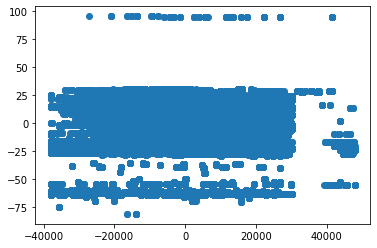

In [333]:
plt.scatter([x[0] for x in reduced_test],[x[1] for x in reduced_test])

In [151]:
df_historic['SCHEDULED_DEPARTURE'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

0         2019-03-01 00:01:00
1         2019-03-01 00:01:00
2         2019-03-01 00:01:00
3         2019-03-01 00:02:00
4         2019-03-01 00:02:00
                  ...        
2458623   2019-07-31 23:59:00
2458624   2019-07-31 23:59:00
2458625   2019-07-31 23:59:00
2458626   2019-07-31 23:59:00
2458627   2019-07-31 23:59:00
Name: SCHEDULED_DEPARTURE, Length: 2458628, dtype: datetime64[ns]

In [200]:
type(df_future['SCHEDULED_DEPARTURE'][0])

str

In [197]:
df_historic['Year'] = pd.to_datetime(df_historic['SCHEDULED_DEPARTURE']).dt.year
df_historic['Month'] = pd.to_datetime(df_historic['SCHEDULED_DEPARTURE']).dt.month
df_historic['Day'] = pd.to_datetime(df_historic['SCHEDULED_DEPARTURE']).dt.day
df_historic['SCHEDULED_DEPARTURE_Time'] = pd.to_datetime(df_historic['SCHEDULED_DEPARTURE'].apply(lambda x : x[-8:]))

In [201]:
df_historic['Diff_Dep'] = (pd.to_datetime(df_historic['DEPARTURE_TIME']) - pd.to_datetime(df_historic['SCHEDULED_DEPARTURE_Time'])).apply(lambda x:x.seconds)

In [155]:
df_historic['Diff_Arr'] = (pd.to_datetime(df_historic['ARRIVAL_TIME']) - pd.to_datetime(df_historic['SCHEDULED_ARRIVAL'])).apply(lambda x:x.seconds)

In [156]:
df_historic['Year'].unique()

array([2019], dtype=int64)

In [157]:
df_historic.drop(['Year','ARRIVAL_TIME','DEPARTURE_TIME','SCHEDULED_DEPARTURE_Time'],axis=1,inplace=True)

In [160]:
df_historic.head(2)

,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Month,Day,Diff_Dep,Diff_Arr
0,2019-03-01 00:01:00,01:37:00,UA,1238,N812UA,DEN,BIL,1.0,14.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3,1,60.0,85380.0
1,2019-03-01 00:01:00,01:33:00,EV,6134,N14171,ORD,BNA,28.0,11.0,40.0,...,NaN,0.0,0.0,19.0,0.0,0.0,3,1,1680.0,1140.0


In [179]:
df_historic['DEPARTURE_DELAY']-df_historic['Diff_Dep']

0            -59.0
1          -1652.0
2              NaN
3         -86223.0
4          -2006.0
            ...   
2458623   -86105.0
2458624    -3009.0
2458625    -2950.0
2458626    -4956.0
2458627     -826.0
Length: 2458628, dtype: float64

In [163]:
import matplotlib 
import matplotlib.pyplot as plt 

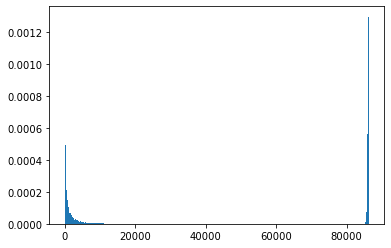

In [174]:
plt.hist(df_historic['Diff_Dep'],bins = 300,density=True)
plt.show()

In [85]:
df_historic.dtypes

SCHEDULED_DEPARTURE     object
DEPARTURE_TIME          object
SCHEDULED_ARRIVAL       object
ARRIVAL_TIME            object
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object